Nama : Syams Muhammad Haryanto<br>
NIM : 211351144<br>
Kelas : TIF Pagi B

# Import Dataset

In [117]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syamsmh","key":"ae02e2e30be3c5ead7a73f4b972c2e09"}'}

In [118]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [119]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 96.6MB/s]


In [120]:
!mkdir diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip -d diabetes-prediction-dataset
!ls diabetes-prediction-dataset

mkdir: cannot create directory ‘diabetes-prediction-dataset’: File exists
Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes-prediction-dataset/diabetes_prediction_dataset.csv  
diabetes_prediction_dataset.csv


# Import Library

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# Data Discovery

In [122]:
df = pd.read_csv('diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [123]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [124]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [126]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [127]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [128]:
df.duplicated().sum()

3854

In [129]:
correlation = df.corr()
correlation['diabetes'].sort_values(ascending=False)

<ipython-input-129-a00e5ca09480>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

# EDA

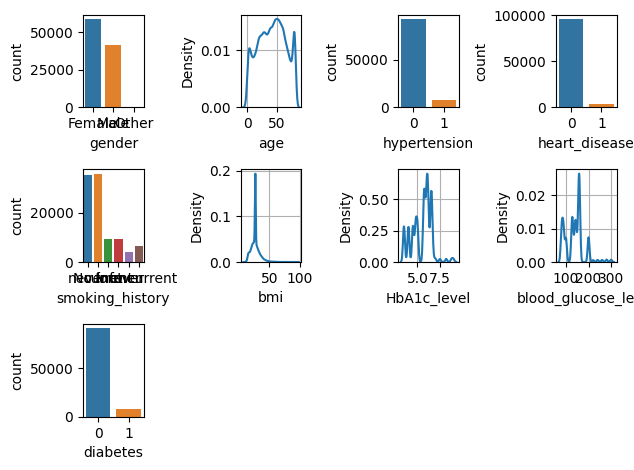

In [130]:
r=3
c=4
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    if df[i].nunique()>6:
        sns.kdeplot(df[i])
        plt.grid()
    else:
        sns.countplot(x=df[i])
    it+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

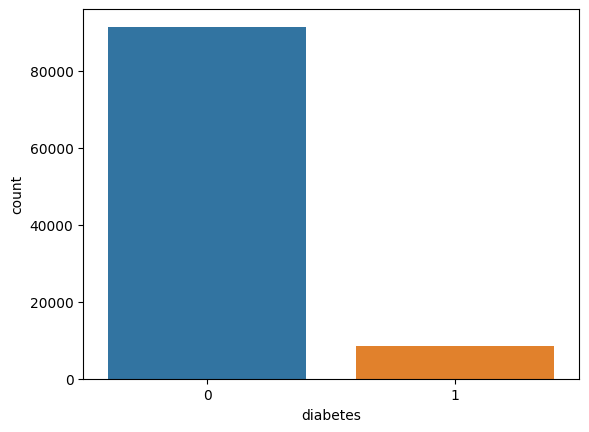

In [131]:
sns.countplot(data=df, x='diabetes')

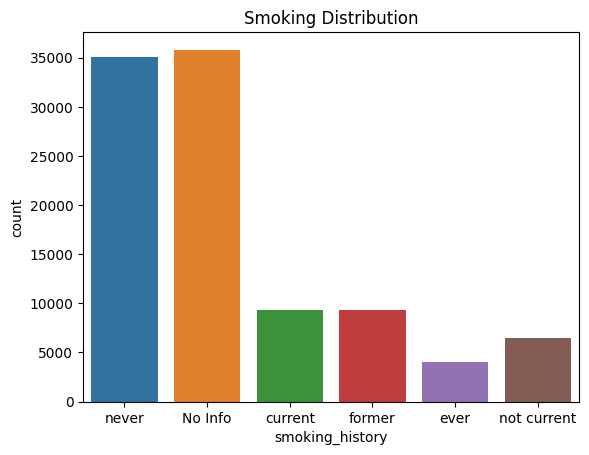

In [132]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking Distribution')
plt.show()

<ipython-input-133-538f763225f6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

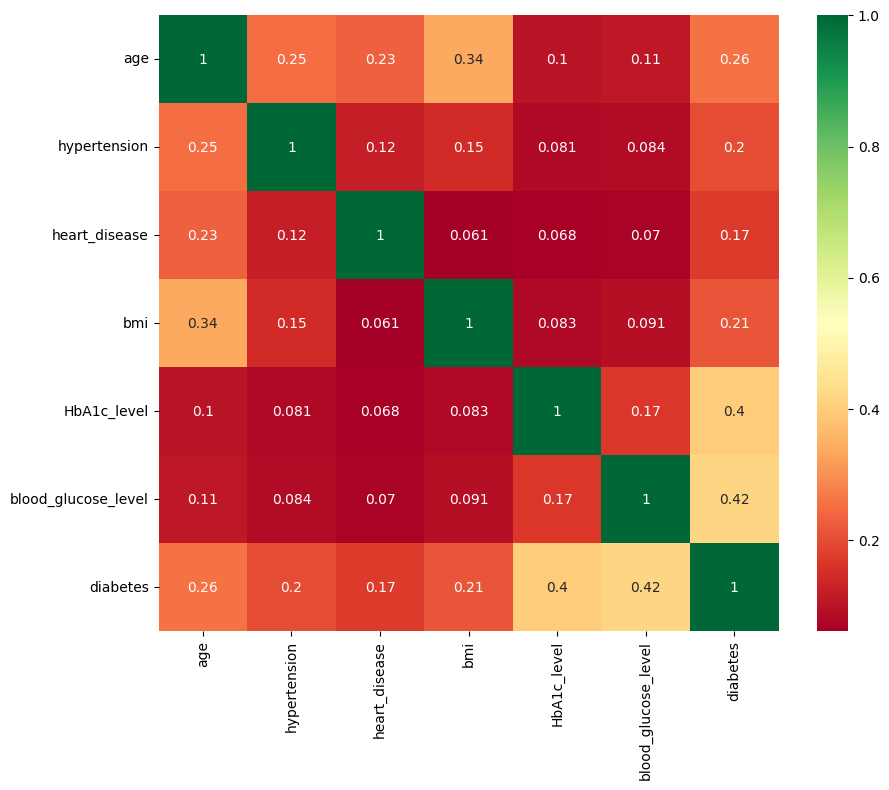

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap ='RdYlGn')

<Axes: >

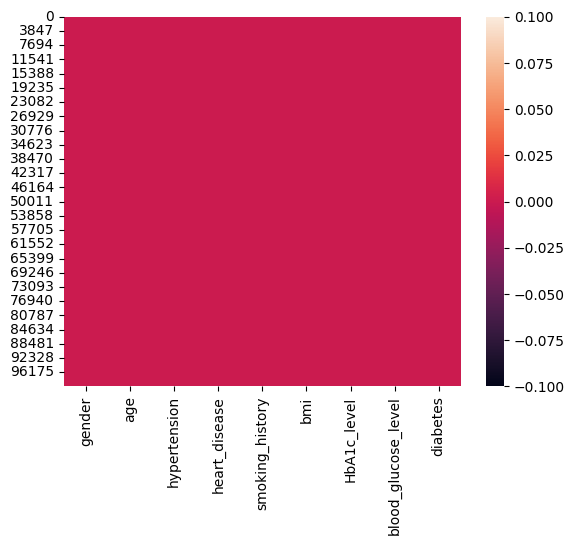

In [134]:
sns.heatmap(df.isnull())

# Preprocessing

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.drop("gender",axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,25.19,6.6,140,0
1,54.0,0,0,No Info,27.32,6.6,80,0
2,28.0,0,0,never,27.32,5.7,158,0
3,36.0,0,0,current,23.45,5.0,155,0
4,76.0,1,1,current,20.14,4.8,155,0


In [137]:
def unbalance_data(df):
    df_pos = df.query("diabetes == 1")
    df_neg = df.query("diabetes == 0").sample(len(df_pos))
    return df_pos, df_neg


df_pos, df_neg = unbalance_data(df)
df_pos.shape, df_neg.shape

((8482, 8), (8482, 8))

In [138]:
def change_string_to_int(column):
    variables=pd.unique(df[column])
    for item in range(variables.size):
        df[column]=[item if each==variables[item] else each for each in df[column]]
    return df[column]

In [151]:
df["smoking_history"]=change_string_to_int("smoking_history")
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,54.0,0,0,1,27.32,6.6,80,0
2,28.0,0,0,0,27.32,5.7,158,0
3,36.0,0,0,2,23.45,5.0,155,0
4,76.0,1,1,2,20.14,4.8,155,0


In [140]:
features = ['age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']
x = df[features]
y = df['diabetes']
x.shape, y.shape

((96146, 7), (96146,))

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x.shape, x_train.shape, x_test.shape)

(96146, 7) (67302, 7) (28844, 7)


# Modeling

In [142]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score = knn.score(x_test, y_test)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy Score: {score}")
print("Classification Report:")
print(classification_rep)

Accuracy Score: 0.947129385660796
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     26312
           1       0.80      0.53      0.64      2532

    accuracy                           0.95     28844
   macro avg       0.88      0.76      0.81     28844
weighted avg       0.94      0.95      0.94     28844



In [143]:
print(confusion_matrix(y_test, y_pred))

[[25965   347]
 [ 1178  1354]]


In [144]:
input_data = np.array([[80.0,0,1,0,25.19,6.6,140]])

prediction = knn.predict(input_data)
print(prediction)
if prediction == [0]:
  print('Tidak Terkena Penyakit Diabetes')
elif prediction == [1]:
  print('Terkena Penyakit Diabetes')

[0]
Tidak Terkena Penyakit Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



# Visualisasi Hasil Algoritma

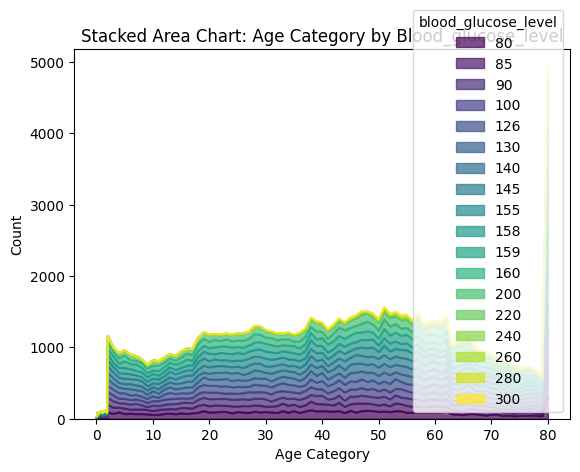

In [145]:
crosstab = pd.crosstab(df['age'],df['blood_glucose_level'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by Blood_glucose_level')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [146]:
def knn_comparison(df, k):
 x = df[['age','blood_glucose_level']].values
 y = df['diabetes'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)

# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)

# Adding axes annotations
 plt.xlabel('age')
 plt.ylabel('blood_glucose_level')
 plt.title('Knn dengan K='+ str(k))
 plt.show()

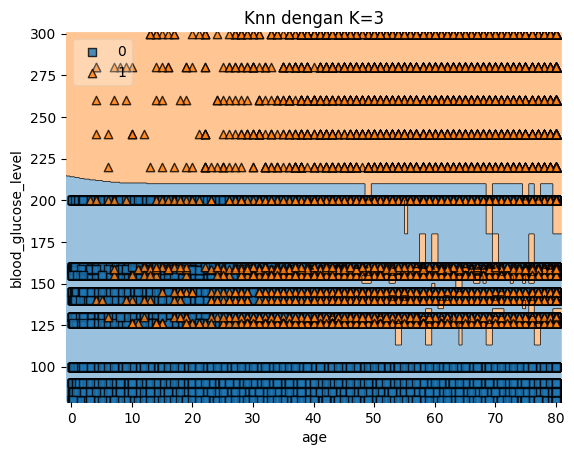

In [147]:
knn_comparison(df, 3)

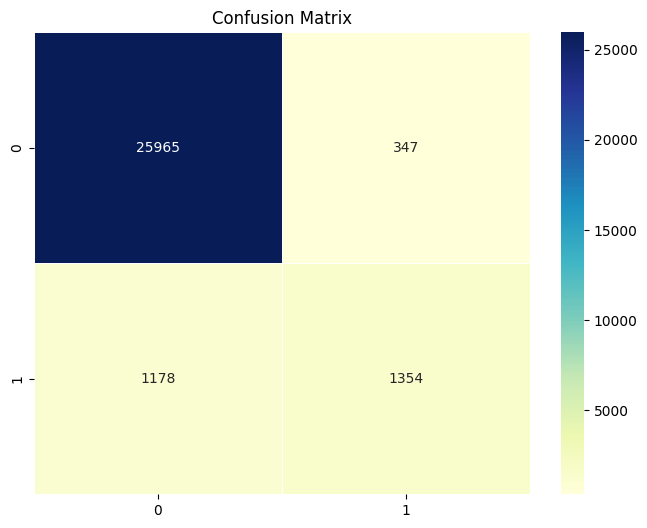

In [148]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()

In [149]:
outcome_freq = df['diabetes'].value_counts()
outcome_freq.index = ['Good', 'Diabetes']  # replace 0 and 1 with text labels
colors = ['#488A99', '#DADADA']
fig = px.pie(outcome_freq, values=outcome_freq.values, names=outcome_freq.index,
             hole=0.7, color=outcome_freq.index, color_discrete_sequence=colors)
fig.update_layout(title='Most people are not affected by diabetes.',
                  plot_bgcolor='#FFFFFF',
                  paper_bgcolor='#FFFFFF',
                  font_color='#333333',
                  title_font_size=24)
fig.update_traces(texttemplate='%{percent:.1%}', textposition='inside')
fig.show()

# Save Model

In [150]:
filename = 'UAS.sav'
pickle.dump(knn,open(filename,'wb'))